# Machine Learning Project: Assessment 2

#### Option:

If option 2, indicating who you have collaborated with on this project. 

#### Your Student ID: 201800626

#### Collaborator Student ID:

This assessment has a 70% weight.

## Case study

For this assignment you may choose to either work alone or in a pair with another student. The requirements for each are set out below.
Note that the assignments are very similar to the Data Science module, but that you are given more freedom in selecting the dataset and the use of techniques.

<font color=red>**Dataset**</font>

The choice of the datasets is free, **but please do not use the datasets discussed in the lectures. <font color=red>Do not use the irsi and MNIST dataset. </font> Here is a list of datasets, https://archive.ics.uci.edu/ml, for your reference**. Your experience in the Data Science module should allow you to pick problems that are challenging, yet manageable.  

<font color=red>**Techniques**</font>

The techniques should be the ones that are discussed in the Machine Learning unit.
Examples are: 

* Bayesian Linear Regression. For example in highlighting the differences between classical linear regression and Bayesian approaches on small dataset. Where does model uncertainty matter? What does Bayesian model selection entail and how is it used in practice.

* Bayesian Logistic Regression. Apply the Laplace approximation and then research extensions such as variational approaches.

* Use of neural networks in classification and regression tasks. Plenty of scope for interesting projects here. 

* Use of Gaussian Mixture Models, for example in the use of outlier classification. Also mixtures of other distributions such as Bernoulli can be considered.

* Use of Graphical models for classification tasks. The project should involve learning parameters and/or the structure of the model from data.

* Sampling Approaches.

* Kernel-based approaches such as SVM. For example, compare the performance of SVMs and neural networks.
 
 
### Option 1: Individual project: two techniques on a dataset 
 
More ambitious projects that build on these techniques are welcome. Projects that do not achieve their intended outcomes can be successful if plausible hypotheses for why the chosen approach did not work are provided. This provision should encourage you to seek out more interesting problems. 
The use of external software such as sklearn, pandas, R, tensorflow, PyTorch, etc. is encouraged, but should be acknowledged and the way they are used should be described accurately in the report. 
A suggestion and a warning: there are very interesting examples of data analysis projects around on the Internet. In some cases, trying to replicate this may lead to an interesting project. If you decided to go this way, you carefully have to describe the original project, where it was found and how your project sets itself apart from what you already could find on Internet. There is a clear risk of falling foul of plagiarism here. If in doubt, consult the module leader.


### Option 2: Group project: four techniques on a dataset

You can collaborate in groups of two to solve the given task if you wish; the workload must be shared equally. If you choose to be in a group then you must apply four techniques on the dataset, with each student taking on the responsibility of applying two techniques and analysing their results. The pre-processing stage must be shared
across the techniques.
Each student will submit their own individual report indicating at the top if you have collaborated with another student on this project. You will be assessed based on your individual contribution to the work, therefore you must make your contribution
clear in your submission.
The techniques we look for are as in the individual project.


## 1. Aims, objectives and plan

### a) Aims and objectives (4 marks)

In this project two different machine learning techniques will be applied to the chosen breast cancer dataset in order to compare their performance and evaluate in regard to the classification problem of determining if the sample is malignant or benign along with which model is more suited for the problem. The two models chosen for this problem is a neural network and a support vector machine in which the objective will be to compare the performance of both the neural network model and the SVM model in classifying this dataset correctly.

These models will be trained on the same training and testing data to allow for accurate comparison of their performance and the techniques used foe evaluation will be the same for both models. 

###  b) Plan (2 marks)

This project was conducted by first selecting the dataset to be used and confirming the problem to be addressed. The data was then examined to see if any cleaning or transformations were required, followed by selecting the two model types which were to be used in the classification task. These models were then created and trained on the training data with hyperparameter tuning applied as required. Finally, the models were run on the test data and evaluated with comparison with the best performing model selected taking practical considerations into account. 


## 2. Understanding the case study

###  Case study analysis (8 marks)

1. Many features within the dataset are highly correlated since they are similar measurement but represent different aspects such as the mean, standard error and worst value. Correlation analysis will be used on the features to identify highly correlated pairs, and models will be trained and evaluated using all features and also only using a subset of features. 
2. There is a class imbalance in this dataset where benign cases are more frequent than malignant cases with benign cases totalling 357 and maliganant cases totalling 212. Oversampling will be tested on this dataset to see if it improves performance but models will also be trained with the full data due to the low number of samples available. This will allow for both cases to be tested and evaluated against, since the number of samples is small it will require minimal training time and therefore is feasible to do this test. 
3. The features within this dataset have varying scales which can affect model performance as it can cause some features to have more of an effect on the weights of the models when training is performed since they are higher values. The features will be standardised to allow them to contribute equally in model training which should improve performance. 
4. The models will be tuned on multiple different hyperparameter combinations to find the best match of these parameters for each model type and then these will be used for the comparisons to ensure that the comparison is running on the most efficient version of each model selected.



## 3. Dataset description (8 marks)

The dataset used in this project is the Breast Cancer Wisconsin diagnostic dataset which contains 569 samples of which 357 of these being classified as benign and 212 as malignant. Each sample contains 30 features which are real-valued and describe different characteristics of the cell nuclei from an image.

While there are not many data instances in this dataset it will require careful model selection to ensure training can be carried out effectively but will also help to aid in not overfitting to that data since there will be less weight tuning for the models.  

There are three versions of each feature giving the mean, standard error and worse values of each characteristic, while these are very similar and show high correlation, they offer different information about each feature and so this will be tested with keeping all features and removing highly correlated features to select the best model. The features to be removed will be features that have over an 0.85 correlation and this set will be analysed alongside the full feature dataset

Standard scaling will be done to these features as in the original dataset the features are on different scales which will greatly reduce the effectiveness of the chosen models since both are sensitive to high variations in scales. The different of scales can be seen in a stacked bar graph shown below.

The models will also be tested with and without class balancing as there is a significant imbalance within this dataset but due to the low number of samples it may make the model worse by reducing these further therefore oversampling using SMOTE will be used to bring up the amount of the minority class  to match the amount of data in the majority class. 

This dataset is available at https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic


In [1]:
# Plot an overview figure of the data or sample data with examples.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from torch.utils.data import DataLoader
from ucimlrepo import fetch_ucirepo
import torch

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets  

In [2]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Set the target variables to number representations to allow for training and evaluation
y = y.iloc[:,0] if y.shape[1] == 1 else y["Diagnosis"]
y = y.map({'B': 0, 'M': 1})
y = y.astype(int)

# Use of stratification to ensure that train and test data are properly distributed in relation to class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Use a standard scaler to ensure all features are within the same range and that no features are over represented
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE oversampling to the train dataset

smote = SMOTE(random_state=42)
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

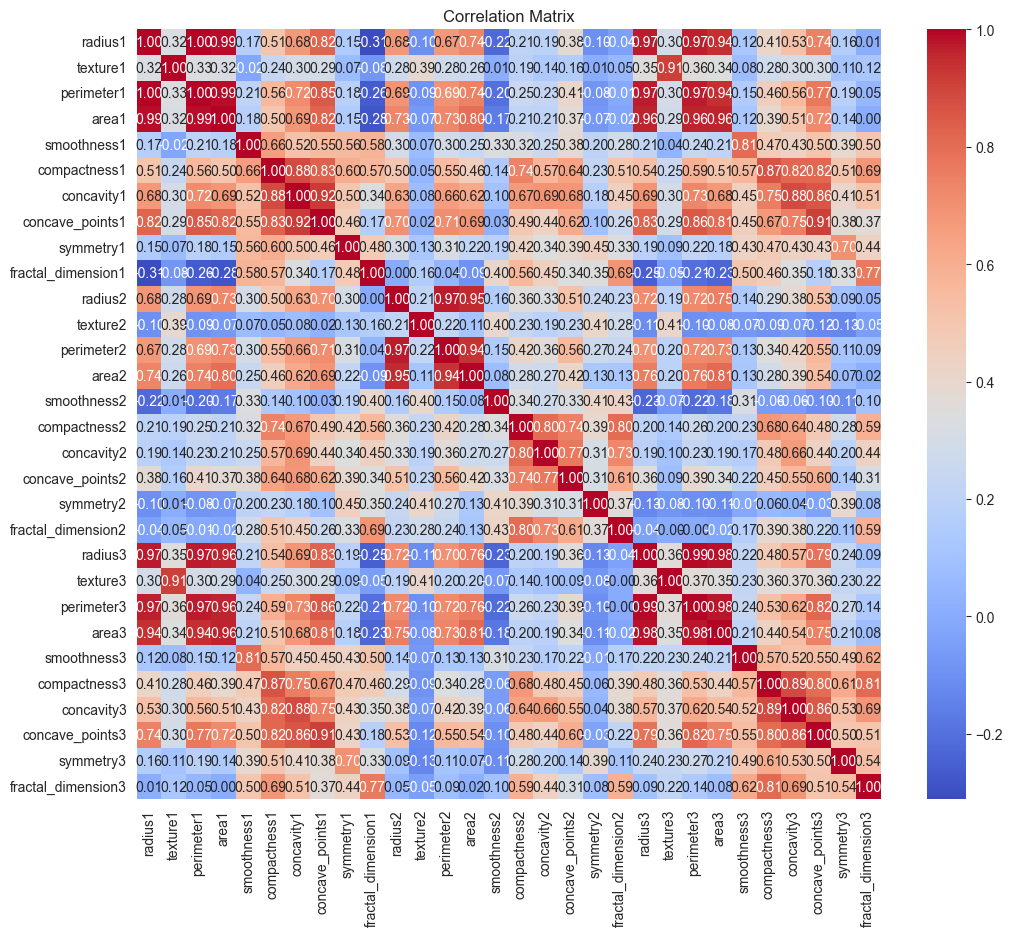

In [4]:
import seaborn as sns

correlation_matrix = X.corr(method="pearson")

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [5]:
threshold = 0.85 # Do not include any features which have a correlation above 0.85

# find all highly correlated feature pairs and add them to the list
highly_correlated = [
    (feature1, feature2)
    for feature1 in correlation_matrix.columns
    for feature2 in correlation_matrix.columns
    if feature1 != feature2 and abs(correlation_matrix.loc[feature1, feature2]) > threshold
]

drop_set = set()
# drop one of the correlated features
for feature1, feature2 in highly_correlated:
    drop_set.add(feature2)

In [6]:
# Create the different dataframes using the reduced feature data
X_train_reduced = pd.DataFrame(X_train, columns=X.columns).drop(columns=drop_set, inplace=False)
X_test_reduced = pd.DataFrame(X_test, columns=X.columns).drop(columns=drop_set, inplace=False)
X_train_sampled_reduced = pd.DataFrame(X_train_sampled, columns=X.columns).drop(columns=drop_set, inplace=False)

In [7]:
from torch.utils.data import Dataset, DataLoader

# Create the class for the dataset to be used in the dataloader
class CancerDataset(Dataset):
    def __init__(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.values
            
        self.x = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        variables = self.x[idx]
        target = self.y[idx]
        
        return variables, target

In [8]:
# unbalanced unreduced data loaders
train_dataset = CancerDataset(X_train, y_train)
test_dataset = CancerDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=32)
test_dataloader = DataLoader(test_dataset, batch_size=32)

# unbalanced reduced data loaders

train_dataset_reduced = CancerDataset(X_train_reduced, y_train)
test_dataset_reduced = CancerDataset(X_test_reduced, y_test)

train_dataloader_reduced = DataLoader(train_dataset_reduced, batch_size=32)
test_dataloader_reduced = DataLoader(test_dataset_reduced, batch_size=32)

# balanced unreduced data loaders

train_dataset_sampled = CancerDataset(X_train_sampled, y_train)

train_dataloader_sampled = DataLoader(train_dataset_sampled, batch_size=32)

# balanced reduced data loaders

train_dataset_sampled_reduced = CancerDataset(X_train_sampled_reduced, y_train)

train_dataloader_sampled_reduced = DataLoader(train_dataset_sampled_reduced, batch_size=32)

Malignant: 212
Benign: 357
Ratio between M and B: 0.5938375350140056


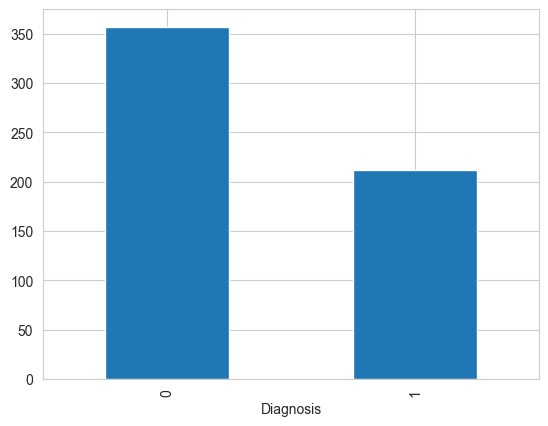

In [9]:
def plot_class_counts(labels):
    counts = labels.value_counts()

    counts.plot(kind='bar', label='Malignant vs Benign')

    print(f"Malignant: {counts.iloc[1]}")
    print(f"Benign: {counts.iloc[0]}")
    print(f"Ratio between M and B: {counts.iloc[1]/counts.iloc[0]}")
    
# Total class counts for benign and malignant
plot_class_counts(y)

Malignant: 285
Benign: 285
Ratio between M and B: 1.0


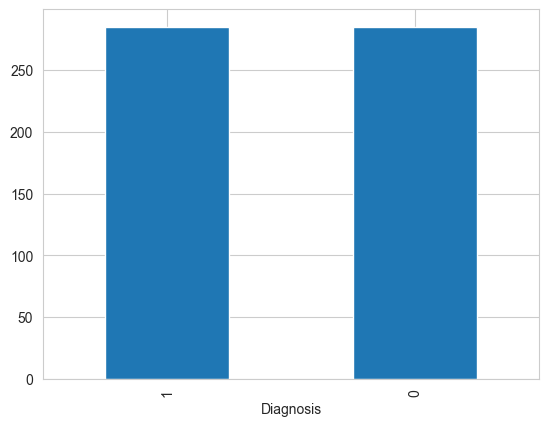

In [10]:
# Class counts for the oversampled training data
plot_class_counts(y_train_sampled)

Malignant: 170
Benign: 285
Ratio between M and B: 0.5964912280701754


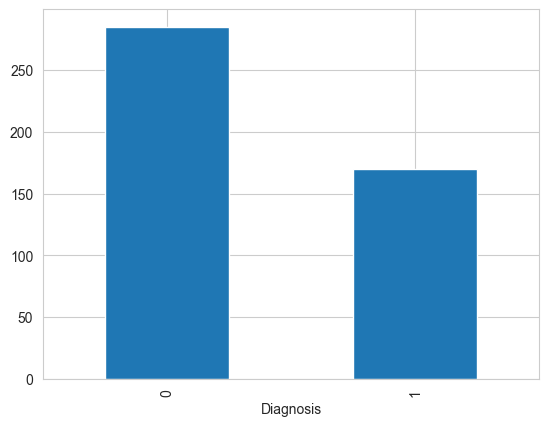

In [11]:
# Class counts for the standard training data 
plot_class_counts(y_train)

In [12]:
# Requires scaling on some variables due to large difference between values which can affect learning. 
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


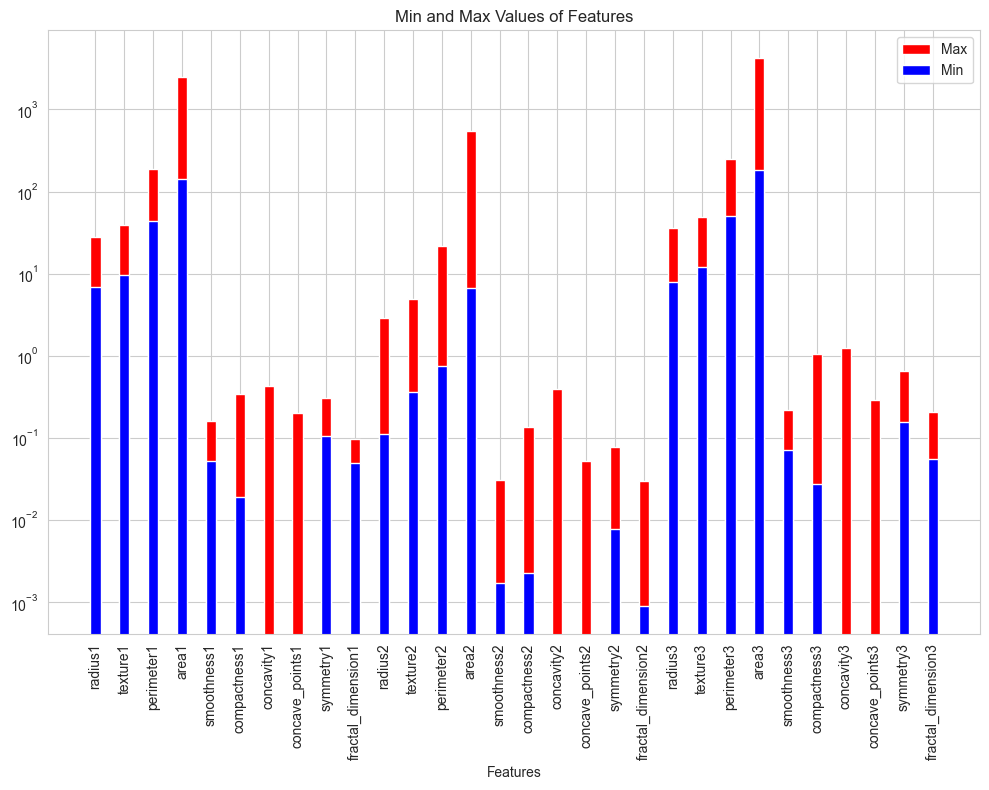

In [13]:
from numpy import arange

# extract min and max values for the columns
labels = [col for col in X.columns]
min_values = [X[col].min()for col in X.columns]
max_values = [X[col].max()for col in X.columns]

x = arange(len(labels))
width = 0.35

# plot stacked barchart of min and max column data for comparison
fig, ax = plt.subplots(figsize=(10, 8))

rects2 = ax.bar(x, max_values, width, label='Max', color='r', log=True)
rects1 = ax.bar(x, min_values, width, label='Min', color='b', log=True)

ax.set_xlabel('Features')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Min and Max Values of Features')
ax.legend()

plt.tight_layout()
plt.show()

## 4. Technique (part 1)

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process (8 marks)

The reason for choosing a neural network model for this problem was that it allows for complex trends in the data to be able to be found and used for predictions from the model weights being adjusted. Using a higher number of nodes and layers allows for more complex relationships to be found but also increases the complexity and training time of the model. (Shi, Z., Wei, J. and Liang, Y., 2022.)

Furthermore, neural networks can automatically learn relevant features from the data without the need for the data to be manually crafted. This is done by the adjusting of the weights for each feature where the relevant features will have more prominent weights, and less important features will have lower weights and thus affect the overall prediction less. 

Finally, neural networks allow for the use of flexibility in optimization techniques, and these can easily be changed in order to train a model less likely to overfit the data or to learn better from the data. 



In [14]:
import base64

# Read the SVG file and encode it in base64
with open('nn.svg', 'rb') as svg_file:
    svg_data = svg_file.read()
    svg_base64 = base64.b64encode(svg_data).decode('utf-8')

# Display the base64 encoded SVG in HTML with a white background
from IPython.display import HTML

# Embedding the base64 encoded SVG with white background in the cell
display(HTML(f'''
<div style="background-color: white; padding: 10px;">
    <img src="data:image/svg+xml;base64,{svg_base64}" width="1200"/>
</div>
'''))


In [15]:
import torch.nn as nn
import torch.nn.functional as F
     
# allow for inputs and dropout_rate to be adjusted based on parameters passed in       
def build_model(inputs, dropout_rate):
    model = nn.Sequential(
        nn.Linear(inputs, 128), # input layer
        nn.LeakyReLU(),
        nn.Dropout(dropout_rate),
        nn.Linear(128, 512), # hidden layer
        nn.LeakyReLU(),
        nn.Linear(512, 2) # output layer for binary classification
    )
    
    return model
    
def train_model(dataloader, model, epochs, optimizer, verbose=0):
    criterion = nn.CrossEntropyLoss()
    
    model.train() # prep model for training
    
    for epoch in range(epochs):
        # monitor training loss
        train_loss = 0.0
        
        ###################
        # train the model #
        ###################
        for data, target in dataloader:
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            
            target = target.long()
            
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()*data.size(0)
            
        # print training statistics 
        # calculate average loss over an epoch
        train_loss = train_loss/len(train_dataloader.dataset)
    
        if verbose >=2:
            print('Epoch: {} \tTraining Loss: {:.6f}'.format(
                epoch+1, 
                train_loss
                ))
            
def evaluate(dataloader, model):
    test_loss = 0.0
    all_preds = []
    all_targets = []
    criterion = nn.CrossEntropyLoss()
    
    model.eval() # prep model for *evaluation*
    
    for data, target in dataloader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        
        target = target.long()
        # calculate the loss
        loss = criterion(output, target)
        # update test loss 
        test_loss += loss.item()*data.size(0)
        
        predictions = torch.argmax(output, dim=1)
        
        all_preds.extend(predictions.squeeze().tolist())
        all_targets.extend(target.squeeze().tolist())
        
    accuracy = accuracy_score(all_targets, all_preds)
    return accuracy, test_loss, all_preds, all_targets

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters (rationale) (5 marks)


In [16]:
# set params to search through
params = {
    'lr': [0.1, 0.01, 0.001, 0.0001],
    'epochs': [20, 50, 100, 200],
    'dropout_rate': [0.0, 0.2, 0.4],
    'optimizer': [torch.optim.Adam, torch.optim.SGD, torch.optim.AdamW],
}

### c) Optimising hyper parameters (5 marks) 


In [17]:
from torch.utils.data import random_split
import random
from sklearn.metrics import accuracy_score

# split data from training set to make validation set
def split_data(dataloader, val_split=0.2):
    dataset = dataloader.dataset
    
    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    
    train_loader = DataLoader(train_dataset, batch_size=dataloader.batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=dataloader.batch_size, shuffle=False)
    
    return train_loader, val_loader

random.seed(1)

# implement random search to be used for the neural network model 
def random_search(train_loader, params, n_iter=5, verbose=0):
    best_params = None
    best_score = 0
    best_model = None
    
    train_set, val_set = split_data(train_loader, val_split=0.2)
    
    features = next(iter(train_set))[0].numpy().shape[1]
    
    for i in range(n_iter):
        # pick random combination of variables and set seed different for each selection
        random.seed(42 + i)
        lr = random.choice(params['lr'])
        epochs = random.choice(params['epochs'])
        dropout_rate = random.choice(params['dropout_rate'])
        optimizer_class = random.choice(params['optimizer'])
        
        if verbose >=1:
            print(f"LR: {lr}, Epochs: {epochs}, Dropout: {dropout_rate}, Optimizer: {optimizer_class}")
        
        model = build_model(features, dropout_rate)
        if model is None: 
            raise ValueError("Model is None")
        
        optimizer = optimizer_class(model.parameters(), lr=lr)
        
        train_model(train_loader, model, epochs, optimizer)
        
        accuracy, test_loss, _, _ = evaluate(val_set, model)
        
        if verbose >= 1:
            print(f"Accuracy: {accuracy:.4f}, Loss: {test_loss:.4f}")
        
        # Keep track of the best hyperparams based on validation accuracy
        if accuracy > best_score:
            best_score = accuracy
            best_model = model
            best_params = {
                'lr': lr,
                'epochs': epochs,
                'dropout_rate': dropout_rate,
                'optimizer': optimizer_class,
            }
    
    return best_params, best_score, best_model

In [18]:
best_params, best_score, best_model = random_search(train_dataloader, params, n_iter=5)

print("Best Hyperparameters: ", best_params)
print(f"Best Validation Accuracy: {best_score}")

Best Hyperparameters:  {'lr': 0.1, 'epochs': 20, 'dropout_rate': 0.4, 'optimizer': <class 'torch.optim.sgd.SGD'>}
Best Validation Accuracy: 1.0


In [19]:
best_params_sampled, best_score_sampled, best_model_sampled = random_search(train_dataloader_sampled, params, n_iter=5)

print("Best Hyperparameters: ", best_params_sampled)
print(f"Best Validation Accuracy: {best_score_sampled}")

Best Hyperparameters:  {'lr': 0.1, 'epochs': 100, 'dropout_rate': 0.4, 'optimizer': <class 'torch.optim.adam.Adam'>}
Best Validation Accuracy: 1.0


In [20]:
best_params_reduced, best_score_reduced, best_model_reduced = random_search(train_dataloader_reduced, params, n_iter=5)

print("Best Hyperparameters: ", best_params_reduced)
print(f"Best Validation Accuracy: {best_score_reduced}")

Best Hyperparameters:  {'lr': 0.1, 'epochs': 200, 'dropout_rate': 0.0, 'optimizer': <class 'torch.optim.adamw.AdamW'>}
Best Validation Accuracy: 1.0


In [21]:
best_params_sampled_reduced, best_score_sampled_reduced, best_model_sampled_reduced = random_search(train_dataloader_sampled_reduced, params, n_iter=5)

print("Best Hyperparameters: ", best_params_sampled_reduced)
print(f"Best Validation Accuracy: {best_score_sampled_reduced}")

Best Hyperparameters:  {'lr': 0.1, 'epochs': 100, 'dropout_rate': 0.4, 'optimizer': <class 'torch.optim.adam.Adam'>}
Best Validation Accuracy: 0.967032967032967


### d) Performance metrics for training (5 marks)

In [47]:
import math
from sklearn.metrics import r2_score, f1_score, accuracy_score

models = [best_model, best_model_reduced, best_model_sampled, best_model_sampled_reduced]
train_loaders = [train_dataloader, train_dataloader_reduced, train_dataloader_sampled, train_dataloader_sampled_reduced]
titles = ["Standard", "Reduced", "Sampled", "S and R"]
model_targets_vs_preds = []

def performance_and_scores(test_loader, model, title, ax):
    # get metrics
    accuracy, test_loss, all_preds, all_targets = evaluate(test_loader, model)
    model_targets_vs_preds.append((all_targets, all_preds))
    accuracy = accuracy_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)
    
    metrics = [accuracy, f1]
    metric_names = ['Accuracy', 'F1']
    x_positions = range(len(metrics))
    
    # plot metrics for accuracy and F1 score
    ax.bar(x_positions, metrics, color=['skyblue', 'red'])
    ax.set_title(title)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(metric_names, rotation=90)
    ax.set_ylim([0, 1])
    ax.grid(True)

# show multiple models metrics at once
def show_results(models, loaders, titles):
    columns = min(4, len(models))
    rows = math.ceil(len(models) / columns)
    
    fig, axes = plt.subplots(rows, columns, figsize=(15, 6))
    axes = axes.flatten() if len(models) > 1 else [axes]
    
    for ax, model, loader, title in zip(axes, models, loaders, titles):
        performance_and_scores(loader, model, title, ax)
        
    # Delete unused subplots
    for idx in range(len(models), len(axes)):
        fig.delaxes(axes[idx])
        
    plt.tight_layout()
    plt.show()


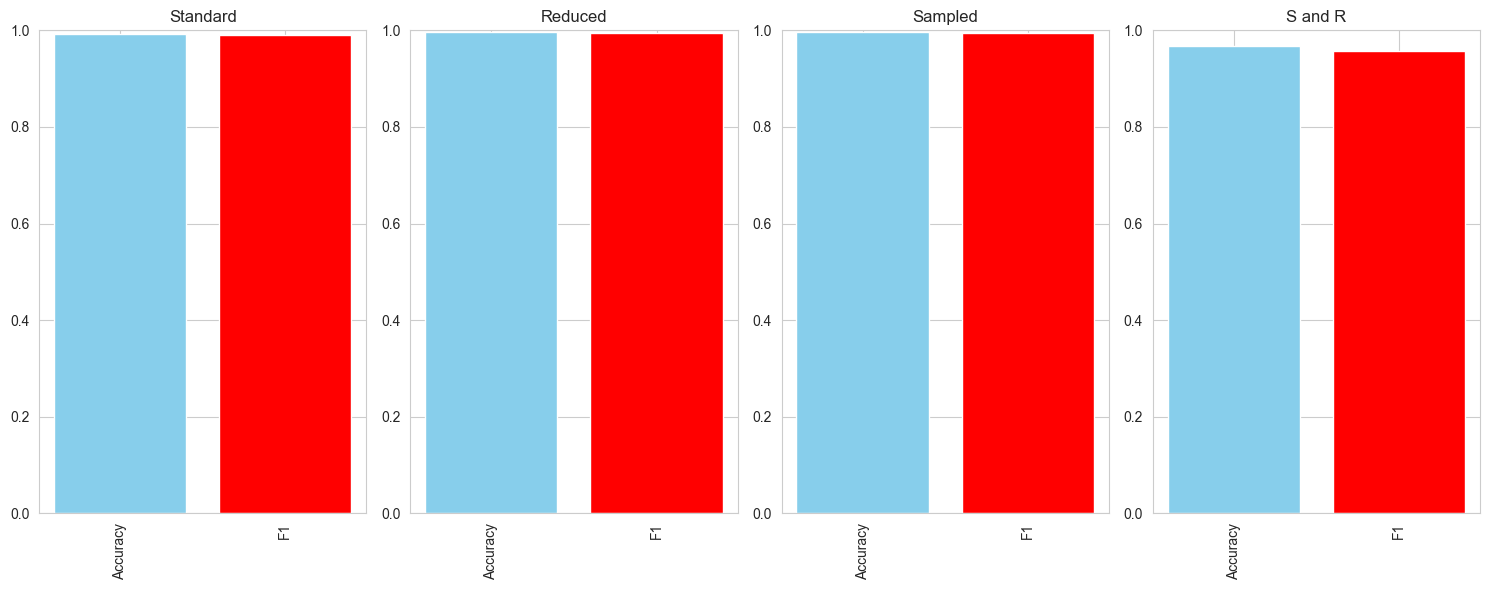

In [48]:
show_results(models, train_loaders, titles)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def show_confusion_matrix(targets_vs_preds, titles):
    for (targets, preds), title in zip(targets_vs_preds, titles):
        print(title, 'Confusion matrix')
        print(confusion_matrix(targets, preds))
        
def create_classification_report(targets_vs_preds, titles):
    for (targets, preds), title in zip(targets_vs_preds, titles):
        print(title, 'Classification report')
        print(classification_report(targets, preds, target_names=["B", "M"]))
        
show_confusion_matrix(model_targets_vs_preds, titles)

Standard Confusion matrix
[[285   0]
 [  3 167]]
Reduced Confusion matrix
[[283   2]
 [  0 170]]
Sampled Confusion matrix
[[285   0]
 [  2 168]]
S and R Confusion matrix
[[275  10]
 [  5 165]]


In [25]:
create_classification_report(model_targets_vs_preds, titles)

Standard Classification report
              precision    recall  f1-score   support

           B       0.99      1.00      0.99       285
           M       1.00      0.98      0.99       170

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455

Reduced Classification report
              precision    recall  f1-score   support

           B       1.00      0.99      1.00       285
           M       0.99      1.00      0.99       170

    accuracy                           1.00       455
   macro avg       0.99      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Sampled Classification report
              precision    recall  f1-score   support

           B       0.99      1.00      1.00       285
           M       1.00      0.99      0.99       170

    accuracy                           1.00       455
   macro avg       1.00      0.99    

## 5. Technique (part 2)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process (8 marks)

The motivation for choosing SVM models was that they allow for versatility in the kernel selected to transform the non-linear data into a higher dimensional space and make the data linearly separable.  This allows the model to perform well even if the data cannot be linearly separated in the original feature space. 

The SVM models also are efficient with smaller datasets and can generalize well even with limited data due to the support vectors and margin maximization techniques. This margin maximization also reduces the risk of overfitting in comparison to other models as it finds the global maximum margin over all the data. 

SVM models also work well in handling imbalanced datasets as they can assign higher penalties to misclassification on the minority class which can help balance the adjustments being made. This is especially useful in medical diagnosis where class imbalances are very common.

As medical diagnostic problems will usually have clear boundaries between classes with symptoms presenting in similar ways, this makes SVM models a good choice for these problems. 


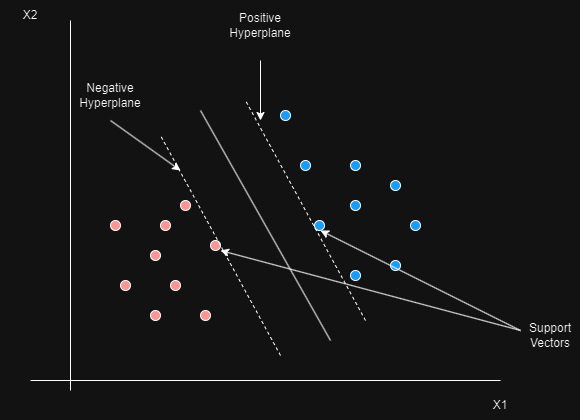

In [26]:
from IPython.display import Image
Image('SVM.drawio.png')

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters (rationale) (5 marks)


In [27]:
from sklearn.svm import SVC, LinearSVC

# Random state set to allow for reproducability
# Class weight set to balanced to adjust weights based on class frequencies
svc = SVC(kernel='linear', C=100, random_state=0, class_weight='balanced')
lSvc = LinearSVC(C=100, random_state=0, class_weight='balanced')

svc_sampled = SVC(kernel='linear', C=100, random_state=0, class_weight='balanced')
lSvc_sampled = LinearSVC(C=100, random_state=0, class_weight='balanced')

svc_reduced = SVC(kernel='linear', C=100, random_state=0, class_weight='balanced')
lSvc_reduced = LinearSVC(C=100, random_state=0, class_weight='balanced')

svc_sampled_reduced = SVC(kernel='linear', C=100, random_state=0, class_weight='balanced')
lSvc_sampled_reduced = LinearSVC(C=100, random_state=0, class_weight='balanced')

### c) Optimising hyper parameters (5 marks)


In [28]:
from sklearn.exceptions import ConvergenceWarning
import warnings

# set parameters for SVM models
svc_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 10, 100, 1000],
    'degree': [1, 2, 3, 4, 5],
    'gamma': ['scale', 'auto'],
    'max_iter': [-1]
}

# Set parameters for LSVM models as these can vary from the non-lineaer SVM models
valid_lsvc_params = [
    {'penalty': ['l2'], 'loss': ['hinge', 'squared_hinge'], 'C': [1, 10, 100, 1000], 'max_iter': [1000, 2000, 5000]},
    {'penalty': ['l1'], 'loss': ['squared_hinge'], 'C': [1, 10, 100, 1000], 'max_iter': [1000, 2000, 5000]}  # Only l2 supports hinge loss
]

# Filter these warnings as they show when max_iter is set too low for lsvc
warnings.filterwarnings('ignore', category=ConvergenceWarning)

best_svc = GridSearchCV(svc, param_grid=svc_params, cv=5)
best_svc.fit(X_train, y_train)
print(f"Best Model Svc = {best_svc.best_params_["kernel"]}, Best Validation Accuracy: {best_svc.best_score_}")

best_lSvc = GridSearchCV(lSvc, param_grid=valid_lsvc_params, cv=5)
best_lSvc.fit(X_train, y_train)
print(f"Best Model lSvc = {best_lSvc.best_params_}, Best Validation Accuracy: {best_lSvc.best_score_}")

best_svc_sampled = GridSearchCV(svc_sampled, param_grid=svc_params, cv=5)
best_svc_sampled.fit(X_train_sampled, y_train_sampled)
print(f"Best Model Svc_S = {best_svc_sampled.best_params_["kernel"]}, Best Validation Accuracy: {best_svc_sampled.best_score_}")

best_lSvc_sampled = GridSearchCV(lSvc_sampled, param_grid=valid_lsvc_params, cv=5)
best_lSvc_sampled.fit(X_train_sampled, y_train_sampled)
print(f"Best Model lSvc_S = {best_lSvc_sampled.best_params_}, Best Validation Accuracy: {best_lSvc_sampled.best_score_}")

best_svc_reduced = GridSearchCV(svc_reduced, param_grid=svc_params, cv=5)
best_svc_reduced.fit(X_train_reduced, y_train)
print(f"Best Model Svc_R = {best_svc_reduced.best_params_["kernel"]}, Best Validation Accuracy: {best_svc_reduced.best_score_}")

best_lSvc_reduced = GridSearchCV(lSvc_reduced, param_grid=valid_lsvc_params, cv=5)
best_lSvc_reduced.fit(X_train_reduced, y_train)
print(f"Best Model lSvc_R = {best_lSvc_reduced.best_params_}, Best Validation Accuracy: {best_lSvc_reduced.best_score_}")

best_svc_sampled_reduced = GridSearchCV(svc_sampled_reduced, param_grid=svc_params, cv=5)
best_svc_sampled_reduced.fit(X_train_sampled_reduced, y_train_sampled)
print(f"Best Model Svc_S = {best_svc_sampled_reduced.best_params_["kernel"]}, Best Validation Accuracy: {best_svc_sampled_reduced.best_score_}")

best_lSvc_sampled_reduced = GridSearchCV(lSvc_sampled_reduced, param_grid=valid_lsvc_params, cv=5)
best_lSvc_sampled_reduced.fit(X_train_sampled_reduced, y_train_sampled)
print(f"Best Model lSvc_S_R = {best_lSvc_sampled_reduced.best_params_}, Best Validation Accuracy: {best_lSvc_sampled_reduced.best_score_}")

Best Model Svc = poly, Best Validation Accuracy: 0.9736263736263737
Best Model lSvc = {'C': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2'}, Best Validation Accuracy: 0.9736263736263737
Best Model Svc_S = rbf, Best Validation Accuracy: 0.982456140350877
Best Model lSvc_S = {'C': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2'}, Best Validation Accuracy: 0.9754385964912281
Best Model Svc_R = rbf, Best Validation Accuracy: 0.9032967032967033
Best Model lSvc_R = {'C': 10, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'}, Best Validation Accuracy: 0.8967032967032967
Best Model Svc_S = rbf, Best Validation Accuracy: 0.9280701754385966
Best Model lSvc_S_R = {'C': 100, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'l2'}, Best Validation Accuracy: 0.9035087719298245


### d) Performance metrics for training (5 marks)

In [49]:
models_svm = [best_svc, best_lSvc, best_svc_sampled, best_lSvc_sampled, best_svc_reduced, best_lSvc_reduced, best_svc_sampled_reduced, best_lSvc_sampled_reduced]
train_loaders_svc = [[train_dataloader]*2, [train_dataloader_sampled]*2, [train_dataloader_reduced]*2, [train_dataloader_sampled_reduced]*2]
train_loaders_flat_svc = [loader for sublist in train_loaders_svc for loader in sublist]
titles_svc = ["Svc Standard", "Lsvc Standard", "Svc Reduced", "Lsvc Reduced", "Svc Sampled", "Lsvc Sampled", "Svc S and R", "Lsvc S and R"]

model_targets_vs_preds_svc = []

# Do not require features name on these graphs
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

# Calculate the metrics for svc models
def performance_and_scores_svc(test_loader, model, title, ax):
    all_preds = []
    all_targets = []
    
    for data, target in test_loader:
        preds = model.predict(data)
        
        all_preds.extend(preds)
        all_targets.extend(target)

    accuracy = accuracy_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)
    
    model_targets_vs_preds_svc.append((all_targets, all_preds))
    
    metrics = [accuracy, f1]
    metric_names = ['Accuracy', 'F1']
    x_positions = range(len(metrics))
    
    # plot the metrics for Accuracy and F1 score
    ax.bar(x_positions, metrics, color=['skyblue', 'red'])
    ax.set_title(title)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(metric_names, rotation=90)
    ax.set_ylim([0, 1])
    ax.grid(True)

# plot multiple model metrics together
def show_results_svc(models, loaders, titles):
    columns = min(4, len(models))
    rows = math.ceil(len(models) / columns)
    
    fig, axes = plt.subplots(rows, columns, figsize=(15, 6))
    axes = axes.flatten() if len(models) > 1 else [axes]
    
    for ax, model, loader, title in zip(axes, models, loaders, titles):
        performance_and_scores_svc(loader, model, title, ax)
        
    # Delete unused subplots
    for idx in range(len(models), len(axes)):
        fig.delaxes(axes[idx])
        
    plt.tight_layout()
    plt.show()

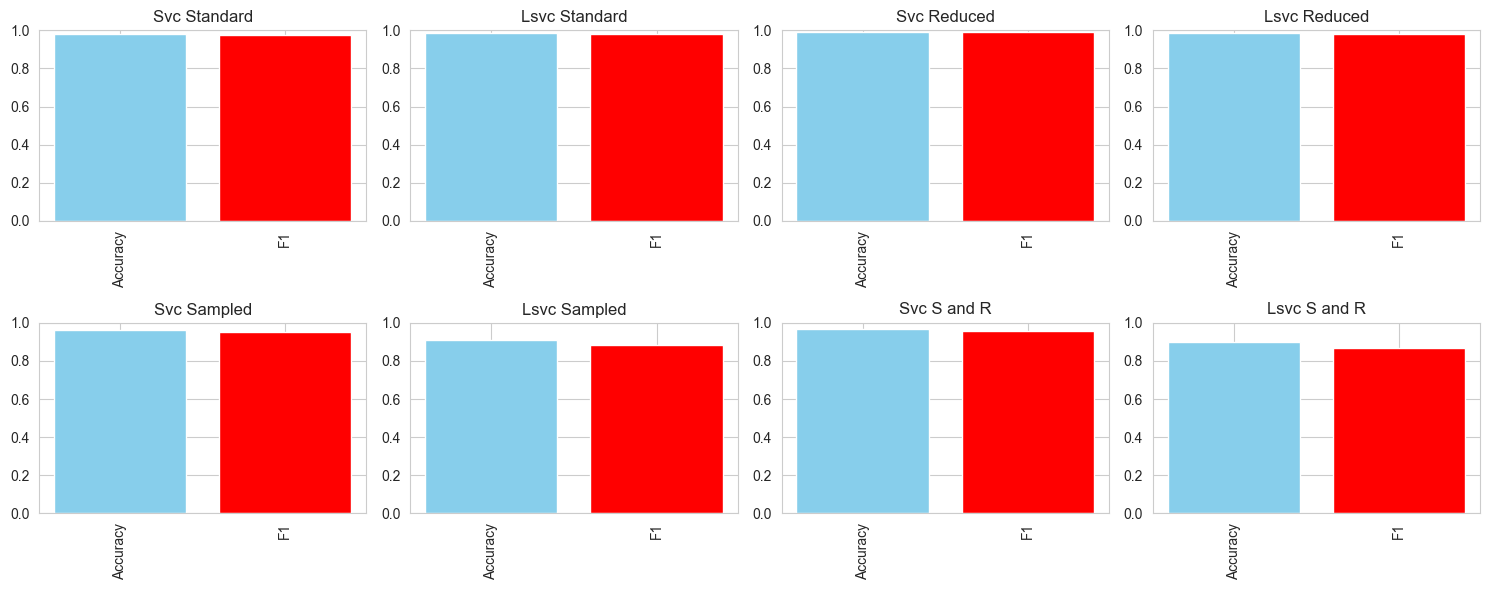

In [50]:
show_results_svc(models_svm, train_loaders_flat_svc, titles_svc)

In [31]:
show_confusion_matrix(model_targets_vs_preds_svc, titles_svc)

Svc Standard Confusion matrix
[[283   2]
 [  6 164]]
Lsvc Standard Confusion matrix
[[282   3]
 [  3 167]]
Svc Reduced Confusion matrix
[[285   0]
 [  3 167]]
Lsvc Reduced Confusion matrix
[[282   3]
 [  4 166]]
Svc Sampled Confusion matrix
[[276   9]
 [  7 163]]
Lsvc Sampled Confusion matrix
[[261  24]
 [ 17 153]]
Svc S and R Confusion matrix
[[277   8]
 [  6 164]]
Lsvc S and R Confusion matrix
[[261  24]
 [ 22 148]]


In [32]:
create_classification_report(model_targets_vs_preds_svc, titles_svc)

Svc Standard Classification report
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       285
           M       0.99      0.96      0.98       170

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455

Lsvc Standard Classification report
              precision    recall  f1-score   support

           B       0.99      0.99      0.99       285
           M       0.98      0.98      0.98       170

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455

Svc Reduced Classification report
              precision    recall  f1-score   support

           B       0.99      1.00      0.99       285
           M       1.00      0.98      0.99       170

    accuracy                           0.99       455
   macro avg       0.99

## 6. Comparison of metrics performance for testing 
Enter the correct code in the cells below to execute each of the stated sub-tasks. 


### a) Examining over-fitting (4 marks)

In [33]:
from sklearn.metrics import log_loss

test_loaders = [test_dataloader, test_dataloader_reduced, test_dataloader, test_dataloader_reduced]

results_nn = []

for model, train_loader, test_loader, title in zip(models, train_loaders, test_loaders, titles):
    # obtain the metrics for the model for training data
    acc, loss, preds, targets = evaluate(train_loader, model)
    # obtain the metrics for the model for testing data
    test_acc, test_loss, test_preds, test_targets = evaluate(test_loader, model)
    
    results_nn.append((title, test_acc, test_loss, test_preds, test_targets))
    
    print(f"Model: {title} Train Accuracy: {acc:.3f}, Train Loss: {loss:.3f} Test Accuracy: {test_acc:.3f}, Test Loss: {test_loss:.3f}")
    

Model: Standard Train Accuracy: 0.993, Train Loss: 16.449 Test Accuracy: 0.991, Test Loss: 6.805
Model: Reduced Train Accuracy: 0.996, Train Loss: 8.518 Test Accuracy: 0.868, Test Loss: 178.821
Model: Sampled Train Accuracy: 0.996, Train Loss: 2611.882 Test Accuracy: 0.974, Test Loss: 32467.273
Model: S and R Train Accuracy: 0.967, Train Loss: 379.258 Test Accuracy: 0.930, Test Loss: 1940.165


In [34]:
svm_dataloaders = [(train_dataloader, test_dataloader), (train_dataloader, test_dataloader), (train_dataloader_sampled, test_dataloader), (train_dataloader_sampled, test_dataloader), (train_dataloader_reduced, test_dataloader_reduced), (train_dataloader_reduced, test_dataloader_reduced),(train_dataloader_sampled_reduced, test_dataloader_reduced), (train_dataloader_sampled_reduced, test_dataloader_reduced)]

results_svm = []

# transform the data in the dataloader to a numpy array so that the batches are not used as the svm models require all data in an array 
def dataloader_to_numpy(dataloader):
    X_list, y_list = [], []
    for batch in dataloader:
        X_batch, y_batch = batch
        X_list.append(X_batch.numpy())
        y_list.append(y_batch.numpy())
        
    X = np.concatenate(X_list, axis=0)
    y = np.concatenate(y_list, axis=0)
    
    return X, y
    
for model, train_test_data, title in zip(models_svm, svm_dataloaders, titles_svc):
    X_train, y_train = dataloader_to_numpy(train_test_data[0])
    X_test, y_test = dataloader_to_numpy(train_test_data[1])
    
    # Predict on training data
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Predict on test data
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Calculate loss (log loss)
    if hasattr(model, "decision_function"):
        y_train_probs = model.decision_function(X_train)
        y_test_probs = model.decision_function(X_test)
    else:
        y_train_probs = model.predict_proba(X_train)
        y_test_probs = model.predict_proba(X_test)
    
    train_loss = log_loss(y_train, y_train_probs)
    test_loss = log_loss(y_test, y_test_probs)
    
    results_svm.append((title, test_accuracy, test_loss, y_test_pred, y_test))
    

    print(f"Model: {title}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

Model: Svc Standard, Train Accuracy: 0.9824, Test Accuracy: 0.9912, Train Loss: 0.5122, Test Loss: 0.3726
Model: Lsvc Standard, Train Accuracy: 0.9868, Test Accuracy: 0.9649, Train Loss: 0.2602, Test Loss: 1.0068
Model: Svc Reduced, Train Accuracy: 0.9934, Test Accuracy: 0.9737, Train Loss: 0.2415, Test Loss: 0.6853
Model: Lsvc Reduced, Train Accuracy: 0.9846, Test Accuracy: 0.9649, Train Loss: 0.3362, Test Loss: 1.0149
Model: Svc Sampled, Train Accuracy: 0.9648, Test Accuracy: 0.8772, Train Loss: 0.8149, Test Loss: 3.2324
Model: Lsvc Sampled, Train Accuracy: 0.9099, Test Accuracy: 0.9035, Train Loss: 1.9776, Test Loss: 3.1999
Model: Svc S and R, Train Accuracy: 0.9692, Test Accuracy: 0.8772, Train Loss: 0.7348, Test Loss: 3.2311
Model: Lsvc S and R, Train Accuracy: 0.8989, Test Accuracy: 0.9035, Train Loss: 2.4420, Test Loss: 3.1939


### b) Comparison with appropriate metrics for testing (4 marks)

[0.9912280701754386, 0.9912280701754386, 0.9649122807017544]
[0.868421052631579, 0.9649122807017544, 0.9736842105263158]
[0.9736842105263158, 0.9736842105263158, 0.9649122807017544]
[0.9298245614035088, 0.9649122807017544, 0.8771929824561403]


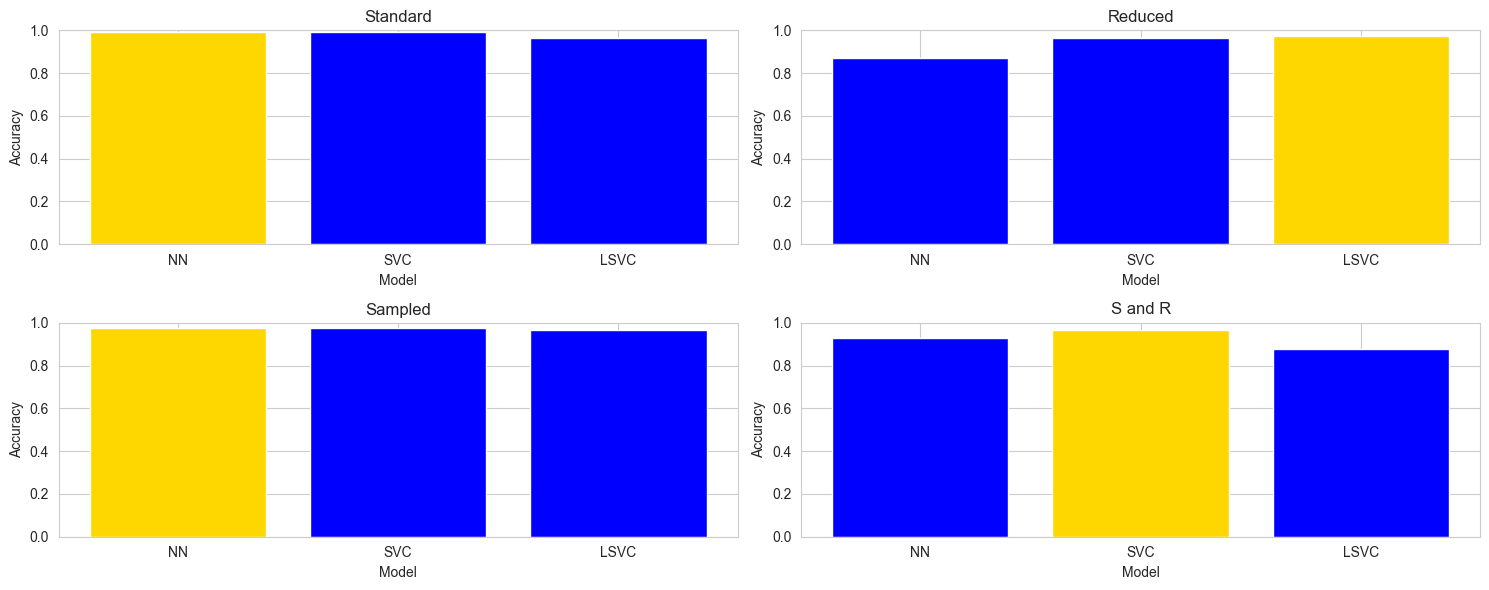

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(15, 6))
axes = axes.flatten() if len(models) > 1 else [axes]

def calculate_metrics(preds, targets):
    f1 = f1_score(y_true=targets, y_pred=preds)
    return r2, f1

def plot_metrics(axes, metric):
    # extract the required metric information from the arrays
    for idx, ax in enumerate(axes):
        nn_preds = results_nn[idx][3]
        nn_targets = results_nn[idx][4]
        svc_preds = results_svm[idx][3]
        svc_targets = results_svm[idx][4]
        lsvc_preds = results_svm[idx+1][3]
        lsvc_targets = results_svm[idx+1][4]
        
        if metric == 3:
            nn_f1 = calculate_metrics(nn_preds, nn_targets)[1]
            svc_f1 = calculate_metrics(svc_preds, svc_targets)[1]
            lsvc_f1 = calculate_metrics(lsvc_preds, lsvc_targets)[1]
        
        metrics = [results_nn[idx][metric], results_svm[idx][metric], results_svm[idx+1][metric]] if metric == 1 or metric == 2 else [nn_f1, svc_f1, lsvc_f1]
        print(metrics)
        # obtain the index of the best metric
        best_metric = np.argmax(metrics) if metric == 1 or metric == 3 else np.argmin(metrics)
        colors = ['blue'] * len(metrics)
        colors[best_metric] = 'gold'
        
        label = ["Accuracy", "Loss", "F1"]
        
        axes[idx].set_title(results_nn[idx][0])
        axes[idx].set_xlabel("Model")
        axes[idx].set_xticks([0, 1, 2])
        axes[idx].set_xticklabels(["NN", "SVC", "LSVC"])
        axes[idx].set_ylabel(label[metric-1])
        axes[idx].set_ylim([0, 1])
        axes[idx].grid(True)
        
        metric_to_plot = [results_nn[idx][metric], results_svm[idx][metric], results_svm[idx+1][metric]] if metric == 1 or metric == 2 else [nn_f1, svc_f1, lsvc_f1]
        
        axes[idx].bar([0, 1, 2], metric_to_plot, color=colors)
   
# plot metric for accuracy     
plot_metrics(axes, 1)
plt.tight_layout()
plt.show()

[6.805110611021519, 0.37258918460579926, 1.006787769681438]
[178.82095420360565, 1.006787769681438, 0.685290684204664]
[32467.27325439453, 0.685290684204664, 1.0148893157597365]
[1940.1649913787842, 1.0148893157597365, 3.2324409868024513]


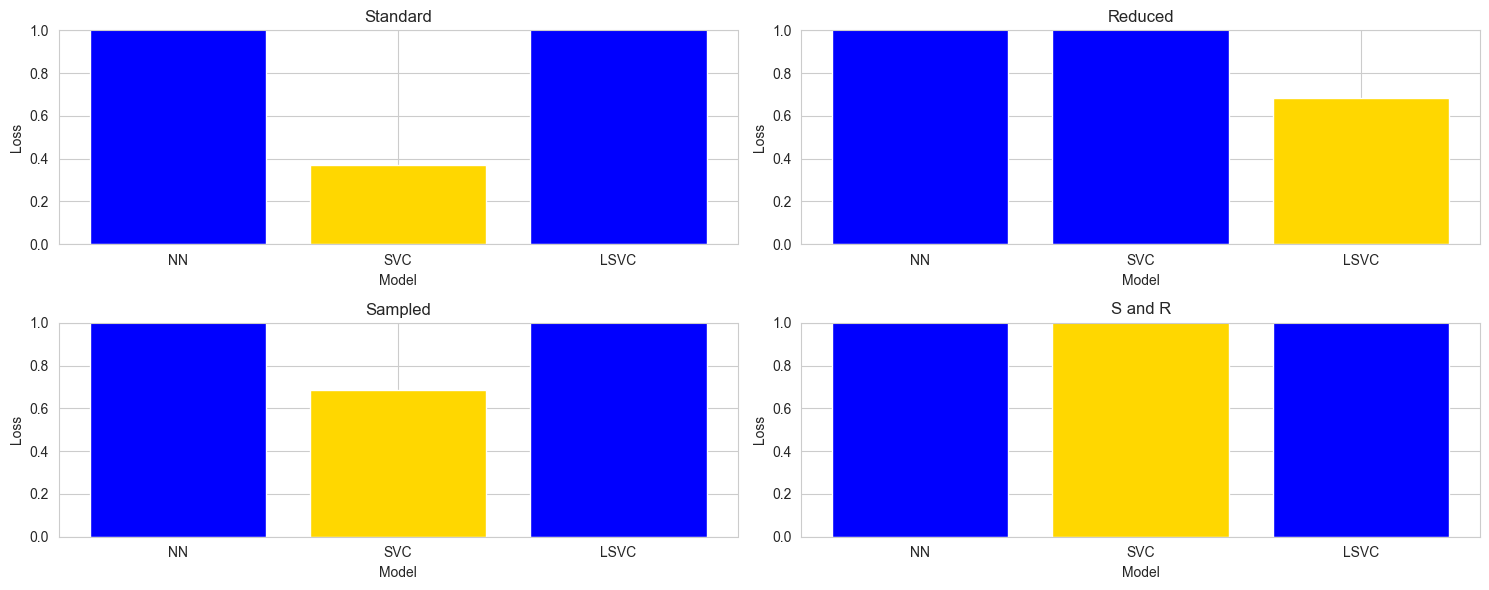

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(15, 6))
axes = axes.flatten() if len(models) > 1 else [axes]

# plot metric for loss
plot_metrics(axes, 2)
plt.tight_layout()
plt.show()

[np.float64(0.9879518072289156), np.float64(0.9879518072289156), np.float64(0.9512195121951219)]
[np.float64(0.8192771084337349), np.float64(0.9512195121951219), np.float64(0.963855421686747)]
[np.float64(0.963855421686747), np.float64(0.963855421686747), np.float64(0.9512195121951219)]
[np.float64(0.9047619047619048), np.float64(0.9512195121951219), np.float64(0.8292682926829268)]


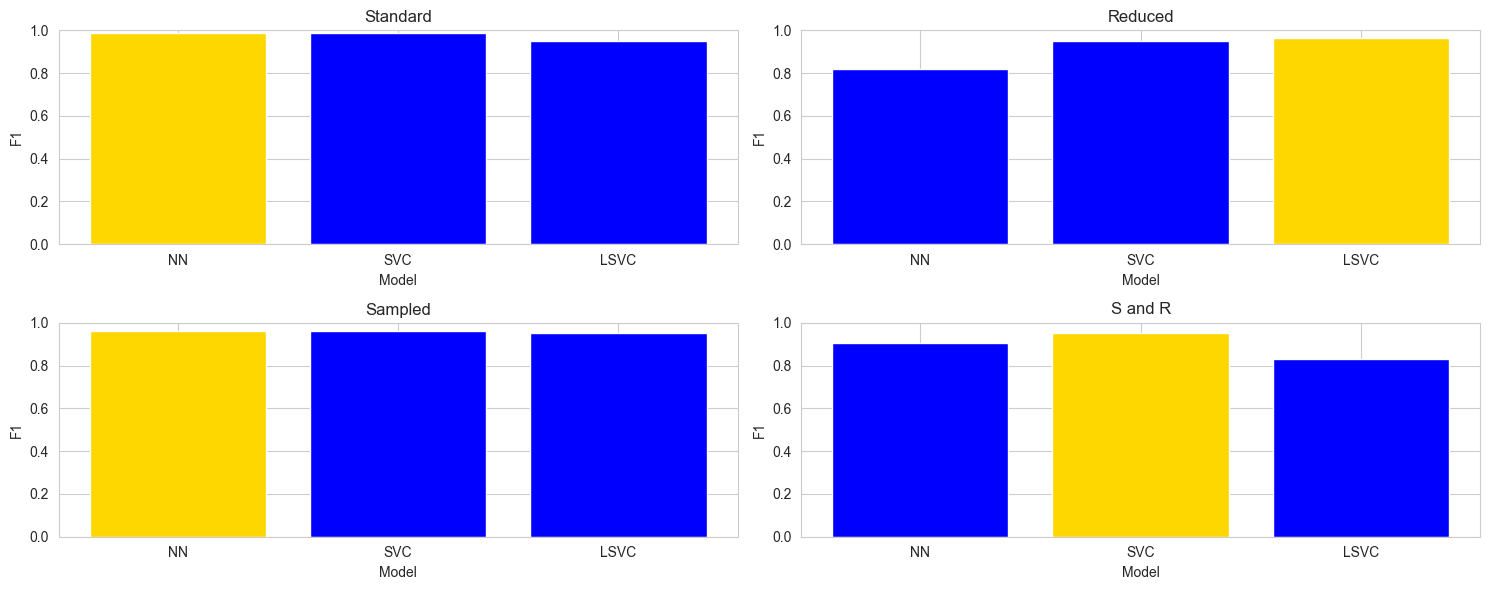

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(15, 6))
axes = axes.flatten() if len(models) > 1 else [axes]

# plot metric for F1 score
plot_metrics(axes, 3)
plt.tight_layout()
plt.show()

In [39]:
for data in results_nn:
    print("NN " + data[0])
    print(confusion_matrix(data[3], data[4]))

NN Standard
[[72  1]
 [ 0 41]]
NN Reduced
[[65  8]
 [ 7 34]]
NN Sampled
[[71  2]
 [ 1 40]]
NN S and R
[[68  4]
 [ 4 38]]


In [40]:
for idx, data in enumerate(results_svm):
    print(data[0])
    print(confusion_matrix(data[3], data[4]))

Svc Standard
[[72  1]
 [ 0 41]]
Lsvc Standard
[[71  3]
 [ 1 39]]
Svc Reduced
[[71  2]
 [ 1 40]]
Lsvc Reduced
[[71  3]
 [ 1 39]]
Svc Sampled
[[66  8]
 [ 6 34]]
Lsvc Sampled
[[66  5]
 [ 6 37]]
Svc S and R
[[66  8]
 [ 6 34]]
Lsvc S and R
[[66  5]
 [ 6 37]]


### c) Model selection (4 marks)

Final model params: {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1}


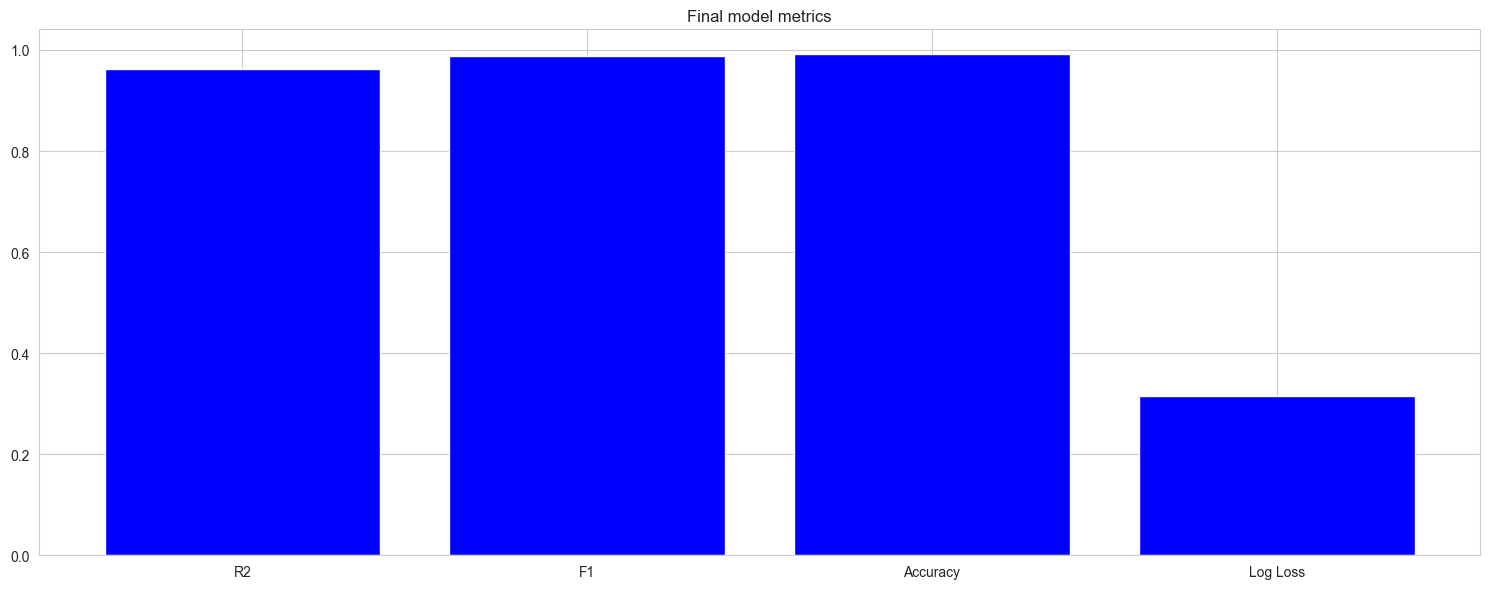

In [42]:
final_model = best_svc
final_metrics = results_svm[0]

print(f"Final model params: {final_model.best_params_}")

r2 = r2_score(y_true=final_metrics[4], y_pred=final_metrics[3])
f1 = f1_score(y_true=final_metrics[4], y_pred=final_metrics[3])
accuracy = accuracy_score(y_true=final_metrics[4], y_pred=final_metrics[3])
l2 = log_loss(y_true=final_metrics[4], y_pred=final_metrics[3])

plt.figure(figsize=(15, 6))
plt.bar([0, 1, 2, 3], [r2, f1, accuracy, l2], color="blue")
plt.title("Final model metrics")
plt.xticks([0, 1, 2, 3], ["R2", "F1", "Accuracy", "Log Loss"])
plt.tight_layout()
plt.show()

In [56]:
print(classification_report(results_svm[0][3], results_svm[0][4], target_names=["B", "M"]))

              precision    recall  f1-score   support

           B       1.00      0.99      0.99        73
           M       0.98      1.00      0.99        41

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## 7. Final recommendation of best model

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency (4 marks)


The final model chosen was the SVM model with a polynomial kernel with a degree of 1, trained on the standard dataset. This model was chosen because it scored either the highest or joint highest across all metrics during testing. The test accuracy of 0.991 show the model correctly classified almost all of the test data with only 1 incorrect classification out of 114.

The precision of the model that calculates how many observed positives are actual positives was 1.00 for the Benign class and 0.98 for the Malignant class showing that the model predictions are correctly classifying the positive data. 

The recall of the model which calculates how many actual positive observations did the model correctly predict as positive was 0.99 for benign and 1.00 for malignant. 

The F1 score which balances precision and recall was 0.99 for both classes. Since the dataset is imbalanced, the high F1 score shows the model was not significantly affected by the imbalanced and could generalize well for both classes.

The low test loss of 0.373 and high performance across metrics suggest that the model avoided overfitting as the gap between test and train performance is minimal especially compared to other models showing much higher loss. Cross-validation was used to ensure the models generalization capabilities and to ensure that model performance was consistent across different training data.  

An SVM with a polynomial degree of 1 was likely a key factor in the model’s success due to the balance of complexity and efficiency that this allows. This model was complex enough to capture the data patterns whilst avoiding overfitting. In contrast, other more complex models and SVMs with higher degree polynomials may have been too complex and flexible to capture the data correctly. 


### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective (4 marks)

The chosen SVM model was selected due to the practical implications in a healthcare setting and its high accuracy. In cancer diagnostics, avoiding false negatives is critical as a delay in treatment could lead to serious health consequences. (Burt, T., Button, K.S., Thom, H.H.Z., Noveck, R.J. and Munafò, M.R., 2017.)

This models ability to accurately classify most of the test cases with only one being misclassified as malignant ensures that any required follow-ups are conducted without endangering the patient. 

Other models like the linearSVM and the neural network models trained on either the reduced, sampled or sample and reduced datasets were classifying some instances of malignant data as benign which could allow for more patient’s condition to worsen before being caught. 

The only other model which matched the accuracy and minimised the false negatives was the neural network trained on the standard dataset which had a much higher loss meaning it would likely be less reliable on larger volumes of unseen data. 

The use of this model will allow for enhanced diagnostic confidence and improved resource allocation by minimizing unnecessary follow-ups.


## 8. Conclusion

### a) What has been successfully accomplished and what has not been successful? (4 marks)

This project was successful in achieving the aims set at the beginning of the project which were to apply two machine learning techniques to the dataset and evaluate their performance on the classification problem of deciding if the data instances are malignant or benign.

Furthermore, the models chosen were trained to high accuracy proving that the models were learning correctly and were able to correctly classify most instances of the test data even in the worst performing models. 

The hyperparameters of the models were also correctly optimised to find the best values to use to learn the data trends and were found using GridSearchCV and a random search when the gridsearch would have taken a long time to execute.

This project was also able to produce models which were unbiased on classification even though there was an imbalance in the dataset. 

Finally, the metrics were displayed in graphs to allow for ease of analysis with the values also shown in number form to allow for more detailed comparison of the numbers where they may not be fully obvious on the graph.

The project was not as successful in ensuring that the best features were used, this is because there were a lot of features to choose from along with an imbalanced dataset which would have led to a lot of combinations of datasets being required to train and test on. As this would have been very time consuming and hard to compare cleanly, only 4 different combinations of features were tested.


### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again? (4 marks)

If I was to do this project again, I would spend more time investigating into which features would be the best to use and to test against more combinations and possibly also use an algorithm such as PCA to help aid this. 

I would also test more different neural network architectures with more hidden layers or different number of nodes inside each layer. This would allow for the potential for the neural network to learn as accurately as possible whilst also lowering the loss on the training and test data to not overfit to the data as much. 

I would also experiment with using different scaling methods and transformations with the data to see if these could lead to an improved outcome or more efficient training times for the models. 

Furthermore, I would use more comprehensive hyperparameter tuning to allow for models to be tested with a wider range of settings to potentially find a more suitable model for the data.

I would also consider adding more advanced techniques for model interpretability to allow for the models to be able to give better insights into how the model makes decisions as this is very important in a healthcare setting. 

Finally, benchmarking these models against industry standards would give insights into how viable the models would be in a real-world medical setting. 


### c) Provide a wish list of future work that you would like to do (4 marks)

Future work I would like to perform on this project is to ensure real-world data including noisy data could be used with these models. This would require the data to be cleaned when required and to ensure data was not missing or to handle any missing data before being passed into the models. 

I would also like to benchmark these models against existing models used in the industry to see the comparison on classification accuracy and other metrics, this would provide the ability to see how these models perform to the top performing current models and where improvements could be made. 

Adding model interpretability would also be a next step in this project to allow for the models to be able to explain why they have given certain predictions. This would allow healthcare providers to review the logic that the model is using and to either improve trust in the model or identify any problematic biases or flaws.


## References

Burt, T., Button, K.S., Thom, H.H.Z., Noveck, R.J. and Munafò, M.R., 2017. The Burden of the “False‐Negatives” in Clinical Development: Analyses of Current and Alternative Scenarios and Corrective Measures. Clinical and translational science, 10(6), pp.470-479.

Shi, Z., Wei, J. and Liang, Y., 2022. A theoretical analysis on feature learning in neural networks: Emergence from inputs and advantage over fixed features. arXiv preprint arXiv:2206.01717.